## Importing Necessary Libraries

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

In [207]:
#Replacing column names with other names
df = pd.read_csv("car.data")
df.rename(columns = {'vhigh':'buying','vhigh.1':'maintenance','2':'doors','2.1':'persons','small':'lug_boot','low':'safety','unacc':'Class'},inplace = True)
df

,buying,maintenance,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


## Checking the presence of Missing Data

In [208]:
print(df.isnull())

      buying  maintenance  doors  persons  lug_boot  safety  Class
0      False        False  False    False     False   False  False
1      False        False  False    False     False   False  False
2      False        False  False    False     False   False  False
3      False        False  False    False     False   False  False
4      False        False  False    False     False   False  False
...      ...          ...    ...      ...       ...     ...    ...
1722   False        False  False    False     False   False  False
1723   False        False  False    False     False   False  False
1724   False        False  False    False     False   False  False
1725   False        False  False    False     False   False  False
1726   False        False  False    False     False   False  False

[1727 rows x 7 columns]


<AxesSubplot:>

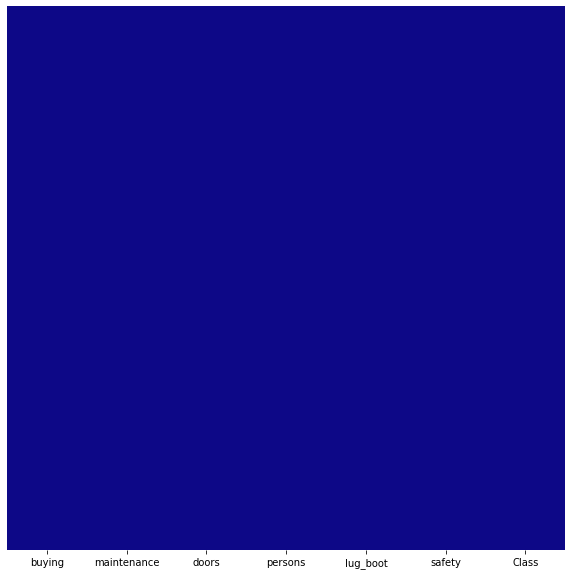

In [209]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'plasma')
#Hence No Null Values or Missing Data

## Handling Categorical Data

In [210]:
df.buying.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [211]:
df.maintenance.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [212]:
df.doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [213]:
df.persons.unique()

array(['2', '4', 'more'], dtype=object)

In [214]:
df.lug_boot.unique()

array(['small', 'med', 'big'], dtype=object)

In [215]:
df.safety.unique()

array(['med', 'high', 'low'], dtype=object)

In [216]:
df.Class.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [217]:
df['buying'] = df['buying'].replace(['vhigh','high','med','low'],[4,3,2,1])
df['maintenance'] = df['maintenance'].replace(['vhigh','high','med','low'],[4,3,2,1])
df['doors'] = df['doors'].replace(['2','3','4','5more'],[2,3,4,5])
df['persons'] = df['persons'].replace(['2','4','more'],[2,4,5])
df['lug_boot'] = df['lug_boot'].replace(['small','med','big'],[1,2,3])
df['safety'] = df['safety'].replace(['med','high','low'],[1,2,3])
df['Class'] = df['Class'].replace(['unacc','acc','vgood','good'],[1,2,3,4])

In [218]:
df

,buying,maintenance,doors,persons,lug_boot,safety,Class
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,2,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1
...,...,...,...,...,...,...,...
1722,1,1,5,5,2,1,4
1723,1,1,5,5,2,2,3
1724,1,1,5,5,3,3,1
1725,1,1,5,5,3,1,4


## Spliting Data for Training and Testing

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis=1),df['Class'], test_size=0.40, 
                                                    random_state=101)

## Applying different Classification Algorithms

### Logistic Regression

In [220]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(max_iter=800)

In [221]:
lm.fit(X_train,y_train)

LogisticRegression(max_iter=800)

In [222]:
y_pred_lm = lm.predict(X_test)

### KNN

In [223]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=42)

In [224]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=42)

In [225]:
y_pred_knn = knn.predict(X_test)

### Support Vector Machine (SVM)

In [226]:
from sklearn.svm import SVC
svc = SVC()

In [227]:
svc.fit(X_train,y_train)

SVC()

In [228]:
y_pred_svc = svc.predict(X_test)

## Decision Tree

In [229]:
from sklearn.tree import DecisionTreeClassifier
dst = DecisionTreeClassifier(max_depth = 50, random_state = 0,criterion = 'entropy')

In [230]:
dst.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state=0)

In [231]:
y_pred_dst = dst.predict(X_test)

## Getting performance metrics for all the applied classifiers

### For Logistic Regression

In [253]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
accuracy = []
cm_lm = confusion_matrix(y_test,y_pred_lm)
cm_lm

array([[452,  33,   5,   2],
       [ 64,  76,   0,   6],
       [  5,  13,   5,   2],
       [  4,  11,   4,   9]], dtype=int64)

In [242]:
print(classification_report(y_test,y_pred_lm))

              precision    recall  f1-score   support

           1       0.86      0.92      0.89       492
           2       0.57      0.52      0.54       146
           3       0.36      0.20      0.26        25
           4       0.47      0.32      0.38        28

    accuracy                           0.78       691
   macro avg       0.57      0.49      0.52       691
weighted avg       0.77      0.78      0.77       691



In [254]:
accuracy.append(accuracy_score(y_test,y_pred_lm))

### For KNN

In [243]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_knn

array([[473,  19,   0,   0],
       [ 26, 116,   0,   4],
       [  1,  12,  10,   2],
       [  5,  11,   4,   8]], dtype=int64)

In [244]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95       492
           2       0.73      0.79      0.76       146
           3       0.71      0.40      0.51        25
           4       0.57      0.29      0.38        28

    accuracy                           0.88       691
   macro avg       0.74      0.61      0.65       691
weighted avg       0.87      0.88      0.87       691



In [255]:
accuracy.append(accuracy_score(y_test,y_pred_knn))

### For SVM

In [245]:
cm_svc = confusion_matrix(y_test,y_pred_svc)
cm_svc

array([[478,  14,   0,   0],
       [ 10, 132,   0,   4],
       [  0,   7,  18,   0],
       [  1,   6,   1,  20]], dtype=int64)

In [246]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           1       0.98      0.97      0.97       492
           2       0.83      0.90      0.87       146
           3       0.95      0.72      0.82        25
           4       0.83      0.71      0.77        28

    accuracy                           0.94       691
   macro avg       0.90      0.83      0.86       691
weighted avg       0.94      0.94      0.94       691



In [256]:
accuracy.append(accuracy_score(y_test,y_pred_svc))

### For Decision Tree

In [248]:
cm_dst = confusion_matrix(y_test,y_pred_dst)
cm_dst

array([[488,   4,   0,   0],
       [  9, 134,   0,   3],
       [  0,   1,  24,   0],
       [  0,   4,   0,  24]], dtype=int64)

In [249]:
print(classification_report(y_test,y_pred_dst))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       492
           2       0.94      0.92      0.93       146
           3       1.00      0.96      0.98        25
           4       0.89      0.86      0.87        28

    accuracy                           0.97       691
   macro avg       0.95      0.93      0.94       691
weighted avg       0.97      0.97      0.97       691



In [257]:
accuracy.append(accuracy_score(y_test,y_pred_dst))

## Visually comparing the performance of all classifiers

In [275]:
ML_Algo = ['Logistic Regression','KNN','SVM','Decision Tree']
df = pd.DataFrame(list(zip(ML_Algo, accuracy)),columns =['Algorithm_Name', 'Score'])      

In [278]:
vrep = sns.light_palette("green", as_cmap = True)
s = df.style.background_gradient(cmap = vrep)
s

,Algorithm_Name,Score
0,Logistic Regression,0.784370
1,KNN,0.878437
2,SVM,0.937771
3,Decision Tree,0.969609


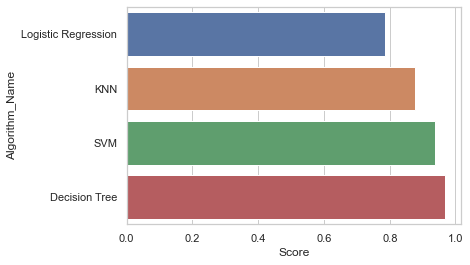

In [279]:
sns.set(style = "whitegrid")
ax = sns.barplot(y = "Algorithm_Name",x = "Score",data = df)